# **Neel Deshmukh**
##Task 5: Sports
###Perform ‘Exploratory Data Analysis’ on dataset ‘Indian Premier League’

###Dataset :(https://bit.ly/34SRn3b)

As a sports analysts, find out the most successful teams, players and factors contributing win or loss of a team.

Suggest teams or players a company should endorse for its products.

##Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving deliveries.csv to deliveries.csv
Saving matches.csv to matches.csv


###DataSet 1

In [ ]:
matches = pd.read_csv("matches.csv")

In [ ]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


## Dataset2

In [ ]:
deliveries = pd.read_csv("deliveries.csv")
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


## Merging Datasets

In [ ]:
merge = pd.merge( deliveries, matches, left_on= 'match_id', right_on ='id' )
merge.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [ ]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179078 entries, 0 to 179077
Data columns (total 39 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [ ]:
merge.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,id,season,dl_applied,win_by_runs,win_by_wickets
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897,1802.252957,2013.444510,0.017914,13.404036,3.261579
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422,3472.322805,3.363947,0.132639,23.261007,3.347033
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,190.000000,2011.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,379.000000,2013.000000,0.000000,0.000000,3.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,567.000000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [ ]:
matches.set_index('id', inplace=True)
matches.describe(include = 'all')

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
count,756.000000,749,756,756,756,756,756,756,756.000000,752,756.000000,756.000000,752,756,754,754,119
unique,NaN,32,546,15,15,15,2,3,NaN,15,NaN,NaN,226,41,61,65,25
top,NaN,Mumbai,21/04/19,Mumbai Indians,Kolkata Knight Riders,Mumbai Indians,field,normal,NaN,Mumbai Indians,NaN,NaN,CH Gayle,Eden Gardens,HDPK Dharmasena,S Ravi,O Nandan
freq,NaN,101,2,101,95,98,463,743,NaN,109,NaN,NaN,21,77,73,57,10
mean,2013.444444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025132,NaN,13.283069,3.350529,NaN,NaN,NaN,NaN,NaN
std,3.366895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.156630,NaN,23.471144,3.387963,NaN,NaN,NaN,NaN,NaN
min,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,2011.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
50%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,4.000000,NaN,NaN,NaN,NaN,NaN
75%,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,19.000000,6.000000,NaN,NaN,NaN,NaN,NaN


## **Data Processing**
### Here we will perform data preprocessing on our matches dataset first, to make the data usable for EDA.



In [ ]:
matches.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN



#Filling in the missing values of city column
First let's find the venues corresponding to which the values of city are empty

In [ ]:
matches[matches.city.isnull()][['city','venue']]

,city,venue
id,,
462,NaN,Dubai International Cricket Stadium
463,NaN,Dubai International Cricket Stadium
467,NaN,Dubai International Cricket Stadium
469,NaN,Dubai International Cricket Stadium
470,NaN,Dubai International Cricket Stadium
475,NaN,Dubai International Cricket Stadium
477,NaN,Dubai International Cricket Stadium


So, missing values can be filled with Dubai

In [ ]:
matches.city = matches.city.fillna('Dubai')

In [ ]:
matches[(matches.umpire1.isnull()) | (matches.umpire2.isnull())]

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
id,,,,,,,,,,,,,,,,,
5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN


Umpire3 column has close to 92% missing values, hence dropping that column

In [ ]:
matches = matches.drop('umpire3', axis = 1)

In [ ]:
city_venue = matches.groupby(['city','venue']).count()['season']
city_venue_df = pd.DataFrame(city_venue)
city_venue_df

season
city           venue                                                     
Abu Dhabi      Sheikh Zayed Stadium                                     7
Ahmedabad      Sardar Patel Stadium, Motera                            12
Bangalore      M Chinnaswamy Stadium                                   66
Bengaluru      M Chinnaswamy Stadium                                    7
               M. Chinnaswamy Stadium                                   7
Bloemfontein   OUTsurance Oval                                          2
Cape Town      Newlands                                                 7
Centurion      SuperSport Park                                         12
Chandigarh     Punjab Cricket Association IS Bindra Stadium, M...      11
               Punjab Cricket Association Stadium, Mohali              35
Chennai        M. A. Chidambaram Stadium                                8
               MA Chidambaram Stadium, Chepauk                         49
Cuttack        Barabati Stadium                                         7
Delhi          Feroz Shah Kotla                                        67
               Feroz Shah Kotla Ground                                  7
Dharamsala     Himachal Pradesh Cricket Association Stadium             9
Dubai          Dubai International Cricket Stadium                      7
Durban         Kingsmead                                               15
East London    Buffalo Park                                             3
Hyderabad      Rajiv Gandhi International Stadium, Uppal               56
               Rajiv Gandhi Intl. Cricket Stadium                       8
Indore         Holkar Cricket Stadium                                   9
Jaipur         Sawai Mansingh Stadium                                  47
Johannesburg   New Wanderers Stadium                                    8
Kanpur         Green Park                                               4
Kimberley      De Beers Diamond Oval                                    3
Kochi          Nehru Stadium                                            5
Kolkata        Eden Gardens                                            77
Mohali         IS Bindra Stadium                                        7
               Punjab Cricket Association IS Bindra Stadium, M...       3
Mumbai         Brabourne Stadium                                       11
               Dr DY Patil Sports Academy                              17
               Wankhede Stadium                                        73
Nagpur         Vidarbha Cricket Association Stadium, Jamtha             3
Port Elizabeth St George's Park                                         7
Pune           Maharashtra Cricket Association Stadium                 21
               Subrata Roy Sahara Stadium                              17
Raipur         Shaheed Veer Narayan Singh International Stadium         6
Rajkot         Saurashtra Cricket Association Stadium                  10
Ranchi         JSCA International Stadium Complex                       7
Sharjah        Sharjah Cricket Stadium                                  6
Visakhapatnam  ACA-VDCA Stadium                                         2
               Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Sta...      11

#Plotting venues along with cities






(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 7 Text major ticklabel objects>)

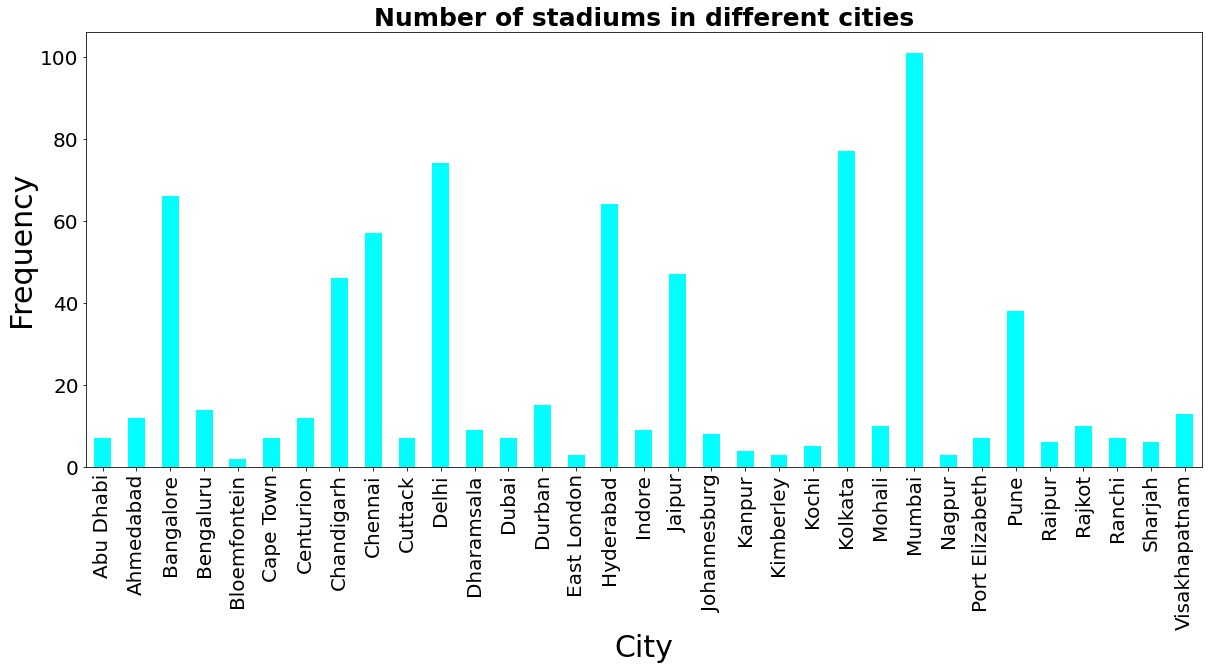

In [ ]:
 v = pd.crosstab(matches['city'],matches['venue'])
#v.replace(v[v!=0],1, inplace = True)

#Adding a column by summing each columns
v['count'] = v.sum(axis = 'columns')
#We will just keep last column = 'count'
b = v['count']

#Plotting
plt.figure(figsize = (20,8))
b.plot(kind = 'bar', color ="cyan")
plt.title("Number of stadiums in different cities", fontsize = 25, fontweight = 'bold')
plt.xlabel("City", size = 30)
plt.ylabel("Frequency", size = 30)
plt.xticks(size = 20)
plt.yticks(size = 20)

#Plotting venues along with cities
Number of matches played in each season¶


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 <a list of 9 Text major ticklabel objects>)

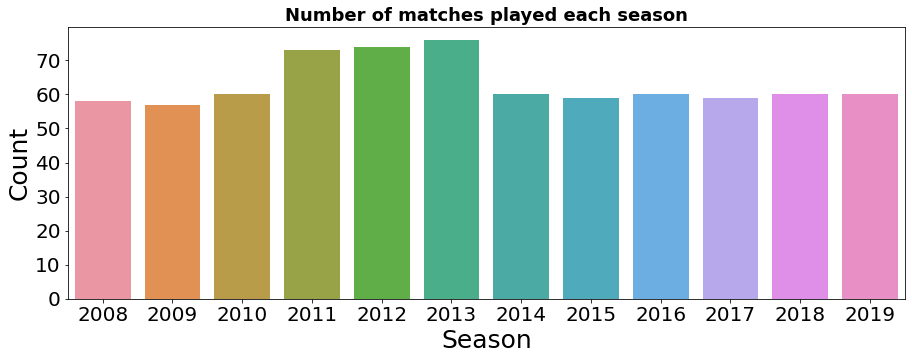

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot('season', data = matches)
plt.title("Number of matches played each season",fontsize=18,fontweight="bold")
plt.ylabel("Count", size = 25)
plt.xlabel("Season", size = 25)
plt.xticks(size = 20)
plt.yticks(size = 20)



*   2011-2013 had most matches per season (70+ matches per season)
*   All other seasons have approximately 58-60 matches



(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 <a list of 7 Text major ticklabel objects>)

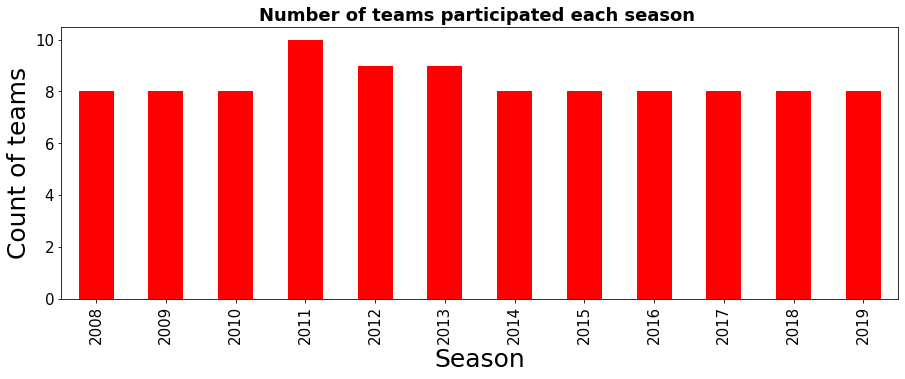

In [ ]:
matches.groupby('season')['team1'].nunique().plot(kind = 'bar', figsize=(15,5), color="red")
plt.title("Number of teams participated each season ",fontsize=18,fontweight="bold")
plt.ylabel("Count of teams", size = 25)
plt.xlabel("Season", size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)


*   10 teams played in 2011 and 9 teams each in 2012 and 2013

*   This explains why 2011-2013 have seen more matches being played than other seasons

Text(0.5, 0, 'Frequency')

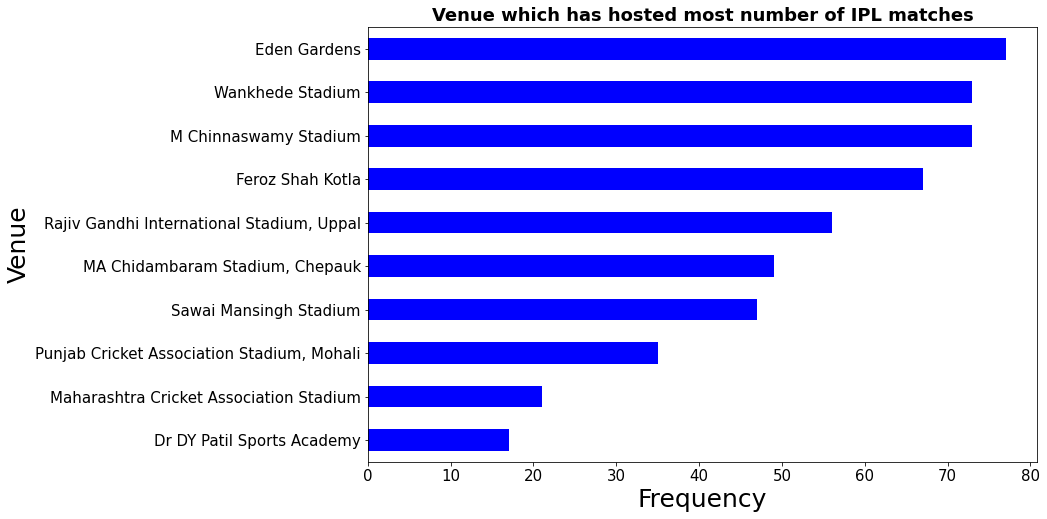

In [ ]:
matches.venue.value_counts().sort_values(ascending = True).tail(10).plot(kind = 'barh',figsize=(12,8), fontsize=15, color='blue')
plt.title("Venue which has hosted most number of IPL matches",fontsize=18,fontweight="bold")
plt.ylabel("Venue", size = 25)
plt.xlabel("Frequency", size = 25)



*  M Chinnaswamy Stadium in Bengaluru has hosted the highest number of matches so far in IPL followed by Eden Gardens in Kolkata



# Team with most wins

In [ ]:
winning_teams = matches[['season','winner']]

In [ ]:
winners_team = {}
for i in sorted(winning_teams.season.unique()):
    winners_team[i] = winning_teams[winning_teams.season == i]['winner'].tail(1).values[0]
    
winners_of_IPL = pd.Series(winners_team)
winners_of_IPL = pd.DataFrame(winners_of_IPL, columns=['team'])

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

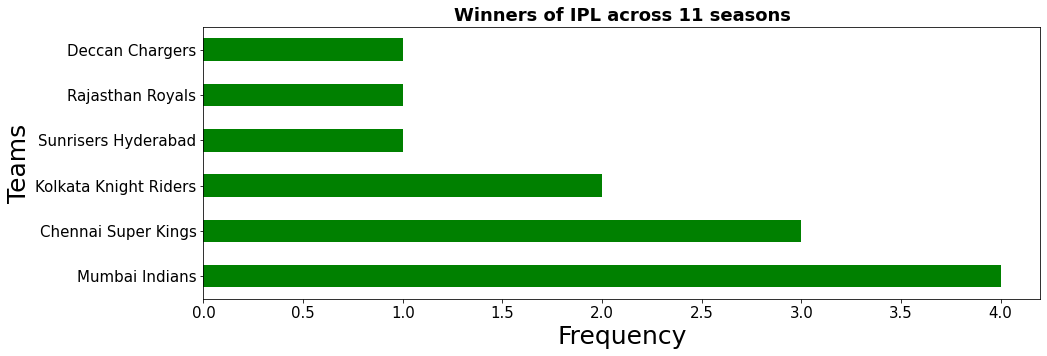

In [ ]:
winners_of_IPL['team'].value_counts().plot(kind = 'barh', figsize = (15,5), color = 'green')
plt.title("Winners of IPL across 11 seasons",fontsize=18,fontweight="bold")
plt.ylabel("Teams", size = 25)
plt.xlabel("Frequency", size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)



* MI and CSK have both won 3 times each followed by KKR who has won 2 times.

* Hyderabad team has also won 2 matches under 2 franchise name - Deccan Chargers and Sunrisers Hyderabad



#Choise for First Innings

Text(0.5, 1.0, 'Choise for First Innings')

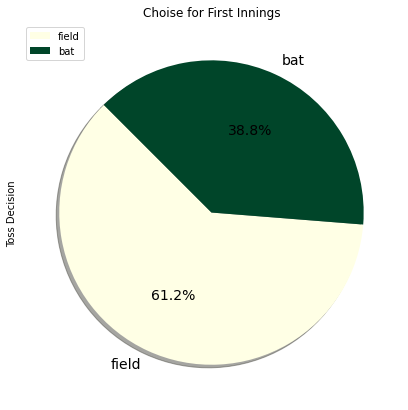

In [ ]:
matches['toss_decision'].value_counts().plot(kind='pie', fontsize=14, autopct='%3.1f%%', 
                                    figsize=(10,7), shadow=True, startangle=135, legend=True, cmap='YlGn')

plt.ylabel('Toss Decision')
plt.title('Choise for First Innings')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Frequency')

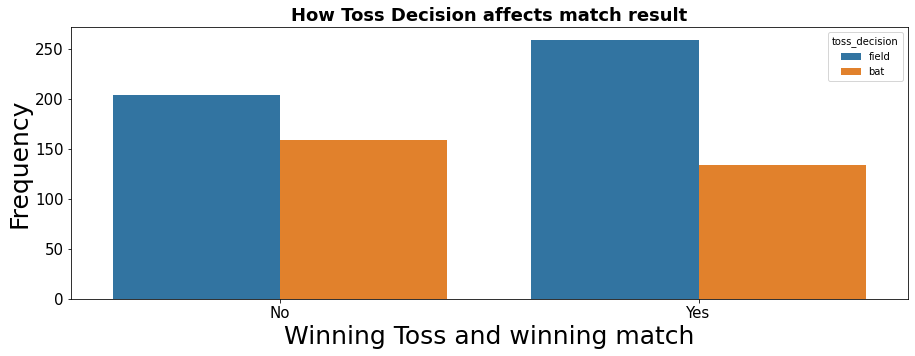

In [ ]:
matches['toss_win_game_win'] = np.where((matches.toss_winner == matches.winner),'Yes','No')
plt.figure(figsize = (15,5))
sns.countplot('toss_win_game_win', data=matches, hue = 'toss_decision')
plt.title("How Toss Decision affects match result", fontsize=18,fontweight="bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Winning Toss and winning match", fontsize = 25)
plt.ylabel("Frequency", fontsize = 25)

# Individual teams decision to choose bat or field after winning toss

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count')

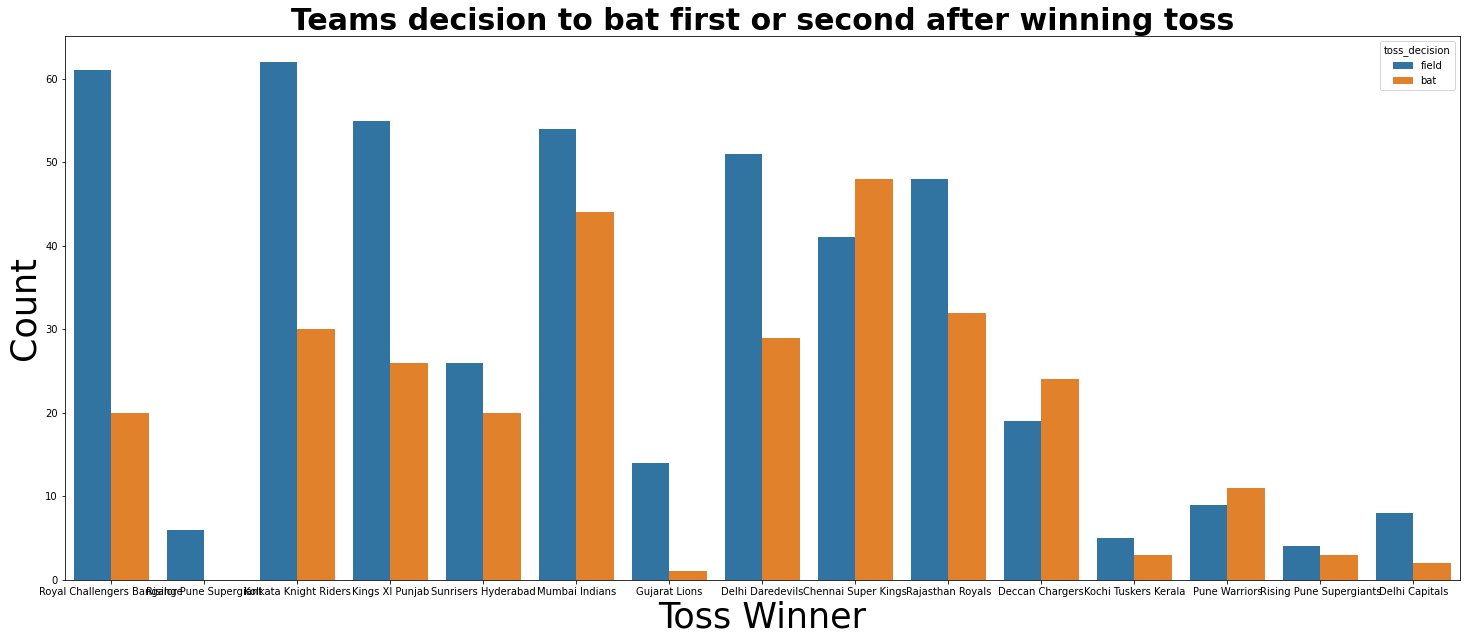

In [ ]:
plt.figure(figsize = (25,10))
sns.countplot('toss_winner', data = matches, hue = 'toss_decision')
plt.title("Teams decision to bat first or second after winning toss", size = 30, fontweight = 'bold')
plt.xlabel("Toss Winner", size = 35)
plt.ylabel("Count", size = 35)


# Most valuable player

Text(0.5, 0, 'Players')

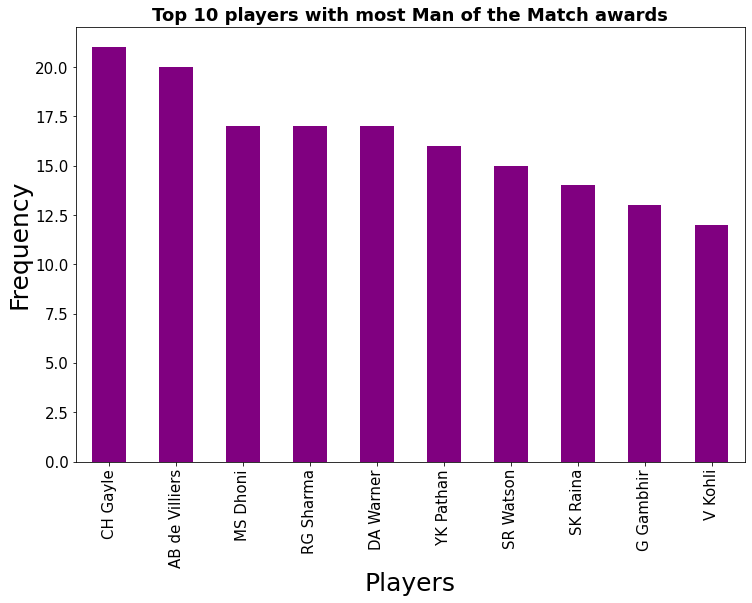

In [ ]:
MoM= matches['player_of_match'].value_counts()
MoM.head(10).plot(kind = 'bar',figsize=(12,8), fontsize=15, color='purple')
plt.title("Top 10 players with most Man of the Match awards",fontsize=18,fontweight="bold")
plt.ylabel("Frequency", size = 25)
plt.xlabel("Players", size = 25)



*   
Chris Gayle has so far won the most number of MoM awards followed by AB de Villiers.

*   Also, all top 10 are batsmen which kind of hints that in IPL batsmen have mostly dictated the matches




# Is batting second advantageous?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count')

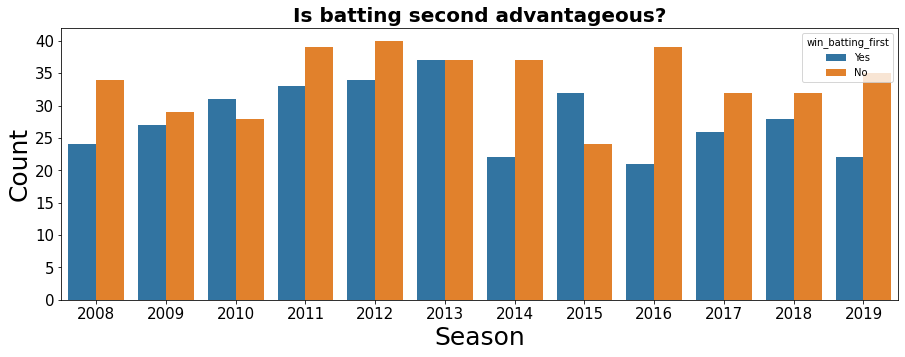

In [ ]:
plt.figure(figsize = (15,5))
sns.countplot('season', data = new_matches, hue = 'win_batting_first')
plt.title("Is batting second advantageous?", fontsize=20,fontweight="bold")
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Season", fontsize = 25)
plt.ylabel("Count", fontsize = 25)



*   Except for 2010 and 2015, in all other years it can be seen that teams batting second have won more matches





# Teams total scoring runs, over the years

(array([15000., 16000., 17000., 18000., 19000., 20000., 21000., 22000.]),
 <a list of 8 Text major ticklabel objects>)

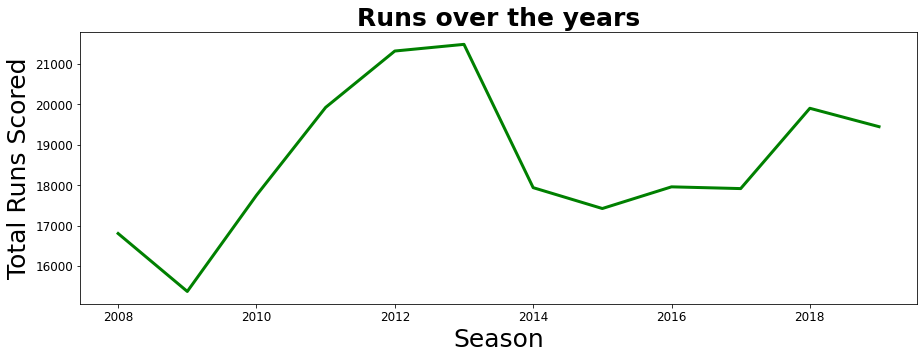

In [ ]:
merge.groupby('season')['batsman_runs'].sum().plot(kind = 'line', linewidth = 3, figsize =(15,5),
                                                                                             color = 'green')
plt.title("Runs over the years",fontsize= 25, fontweight = 'bold')
plt.xlabel("Season", size = 25)
plt.ylabel("Total Runs Scored", size = 25)
plt.xticks(size = 12)
plt.yticks(size = 12)

## Most performing batsman

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000.]),
 <a list of 7 Text major ticklabel objects>)

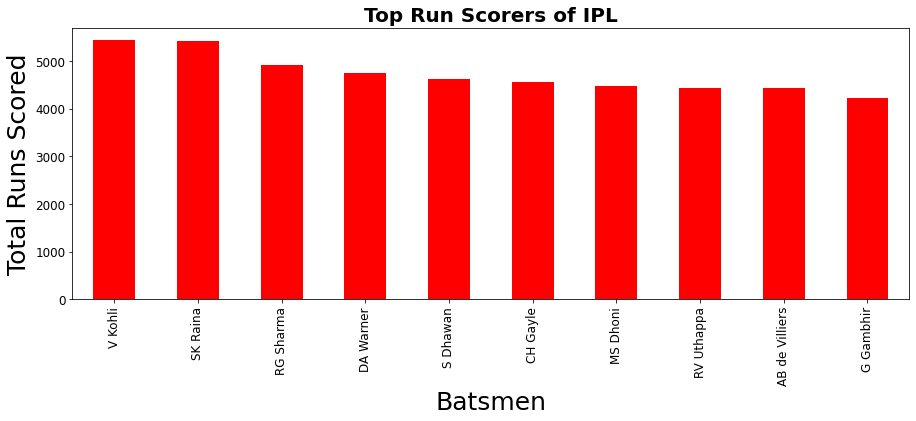

In [ ]:
merge.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False).head(10).plot(kind = 'bar', color = 'red',
                                                                                            figsize = (15,5))
plt.title("Top Run Scorers of IPL", fontsize = 20, fontweight = 'bold')
plt.xlabel("Batsmen", size = 25)
plt.ylabel("Total Runs Scored", size = 25)
plt.xticks(size = 12)
plt.yticks(size = 12)



*   Virat Kohli is the highest run getter in IPL.



# Most consistent batsman of IPL

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 <a list of 8 Text major ticklabel objects>)

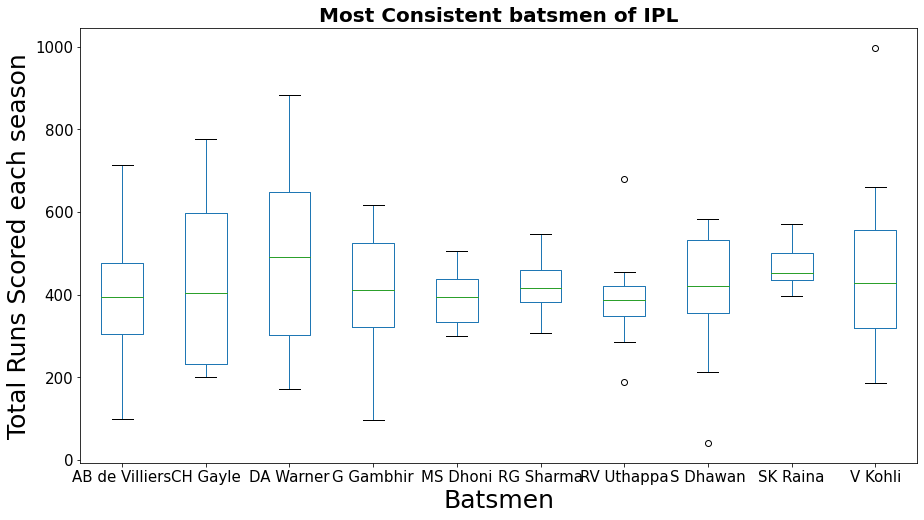

In [ ]:
consistent_batsman = merge[merge.batsman.isin(['SK Raina', 'V Kohli','RG Sharma','G Gambhir',
                                            'RV Uthappa', 'S Dhawan','CH Gayle', 'MS Dhoni',
                                            'DA Warner', 'AB de Villiers'])][['batsman','season','total_runs']]

consistent_batsman.groupby(['season','batsman'])['total_runs'].sum().unstack().plot(kind = 'box', figsize = (15,8))
plt.title("Most Consistent batsmen of IPL", fontsize = 20, fontweight = 'bold')
plt.xlabel("Batsmen", size = 25)
plt.ylabel("Total Runs Scored each season", size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)



*   Median score for Raina is above all the top 10 run getters. 
*   He has the highest lowest run among all the batsmen across 11 seasons.
*   Considering the highest and lowest season totals and spread of runs, it seems Raina has been most consistent among all.



# Most Performing Bowler

(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200.]),
 <a list of 9 Text major ticklabel objects>)

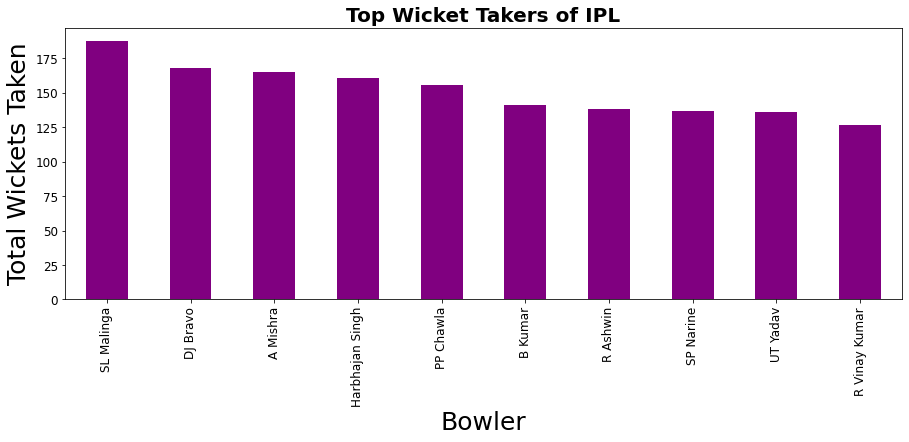

In [ ]:
merge.groupby('bowler')['player_dismissed'].count().sort_values(ascending = False).head(10).plot(kind = 'bar', 
                                                color = 'purple', figsize = (15,5))
plt.title("Top Wicket Takers of IPL", fontsize = 20, fontweight = 'bold')
plt.xlabel("Bowler", size = 25)
plt.ylabel("Total Wickets Taken", size = 25)
plt.xticks(size = 12)
plt.yticks(size = 12)

* Malinga has taken the most number of wickets in IPL followed by Bravo and Amit Mishra

* In top 10 bowlers, 5 are fast and medium pacers while the other 5 are spinners

* All 5 spinners are right arm spinners and 2 are leg spinners while 3 are off spinners

* All 5 pacers are right arm pacers

# Batsmen with the best strike rates over the years
### We will consider players who have played 10 or more seasons

In [ ]:
no_of_balls = pd.DataFrame(merge.groupby('batsman')['ball'].count()) #total number of matches played by each batsman
runs = pd.DataFrame(merge.groupby('batsman')['batsman_runs'].sum()) #total runs of each batsman
seasons = pd.DataFrame(merge.groupby('batsman')['season'].nunique()) #season = 1 implies played only 1 season

batsman_strike_rate = pd.DataFrame({'balls':no_of_balls['ball'],'run':runs['batsman_runs'],'season':seasons['season']})
batsman_strike_rate.reset_index(inplace = True)

batsman_strike_rate['strike_rate'] = batsman_strike_rate['run']/batsman_strike_rate['balls']*100
highest_strike_rate = batsman_strike_rate[batsman_strike_rate.season.isin([10,11])][['season','batsman','strike_rate']].sort_values(by = 'strike_rate',
                                                                                                            ascending = False)
highest_strike_rate.head(10)

,season,batsman,strike_rate
92,11,CH Gayle,145.640370
213,10,KA Pollard,141.751527
112,10,DA Warner,139.523249
444,11,SR Watson,136.945813
72,11,BB McCullum,127.332746
449,10,STR Binny,126.000000
118,11,DJ Bravo,125.565801
514,11,Yuvraj Singh,125.283190
53,10,AT Rayudu,124.058187
147,11,G Gambhir,119.835414


(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 <a list of 9 Text major ticklabel objects>)

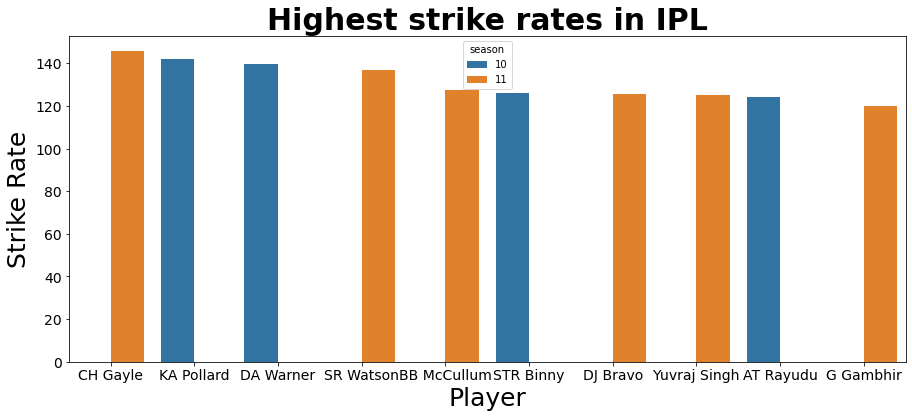

In [ ]:
plt.figure(figsize = (15,6))
sns.barplot(x='batsman', y='strike_rate', data = highest_strike_rate.head(10), hue = 'season')
plt.title("Highest strike rates in IPL",fontsize= 30, fontweight = 'bold')
plt.xlabel("Player", size = 25)
plt.ylabel("Strike Rate", size = 25)
plt.xticks(size = 14)
plt.yticks(size = 14)

# Bowlers with most of extras

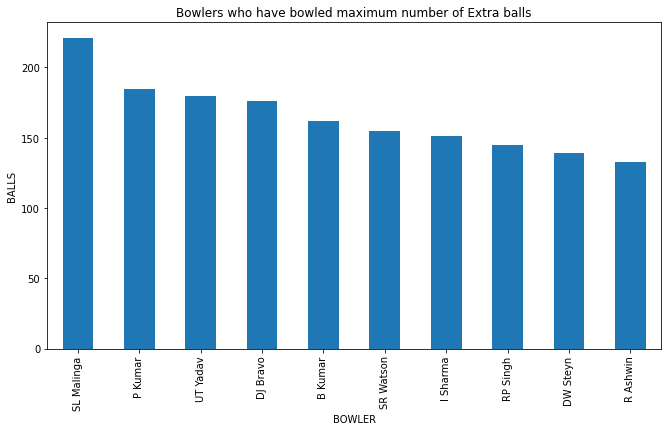

,SL Malinga,P Kumar,UT Yadav,DJ Bravo,B Kumar,SR Watson,I Sharma,RP Singh,DW Steyn,R Ashwin
bowler,221,185,180,176,162,155,151,145,139,133


In [ ]:
extra = deliveries[deliveries['extra_runs']!=0]['bowler'].value_counts()[:10]
extra.plot(kind='bar', figsize=(11,6), title='Bowlers who have bowled maximum number of Extra balls')

plt.xlabel('BOWLER')
plt.ylabel('BALLS')
plt.show()

extra = pd.DataFrame(extra)
extra.T

# Which bowlers have picked up wickets more frequently?

In [ ]:
balls_bowled = pd.DataFrame(merge.groupby('bowler')['ball'].count())
wickets_taken = pd.DataFrame(merge[merge['dismissal_kind'] != 'no dismissal'].groupby('bowler')['dismissal_kind'].count())
seasons_played = pd.DataFrame(merge.groupby('bowler')['season'].nunique())
bowler_strike_rate = pd.DataFrame({'balls':balls_bowled['ball'],'wickets':wickets_taken['dismissal_kind'],
                          'season':seasons_played['season']})
bowler_strike_rate.reset_index(inplace = True)

In [ ]:
bowler_strike_rate['strike_rate'] = bowler_strike_rate['balls']/bowler_strike_rate['wickets']
def highlight_cols(s):
    color = 'none'
    return 'background-color: %s' % color
#Strike rate for bowlers who have taken more than 50 wickets
best_bowling_strike_rate = bowler_strike_rate[bowler_strike_rate['wickets'] > 50].sort_values(by = 'strike_rate', ascending = True)
best_bowling_strike_rate.head().style.applymap(highlight_cols, subset=pd.IndexSlice[:, ['bowler', 'wickets','strike_rate']])

,bowler,balls,wickets,season,strike_rate
134,Imran Tahir,1249,82,6,15.231707
340,SL Malinga,2974,188,9,15.819149
93,DJ Bravo,2711,168,10,16.136905
9,A Nehra,1974,121,9,16.314050
225,MM Patel,1382,82,7,16.853659


# **Conclusion:**
* Mumbai Indians is the most successful team in IPL and has won the most number of toss.

* There were more matches won by chasing the total(419 matches) than defending(350 matches)

* When defending a total, the biggest victory was by 146 runs(Mumbai Indians defeated Delhi Daredevils by 146 runs on 06 May 2017 at Feroz Shah Kotla stadium, Delhi).

* When chasing a target, the biggest victory was by 10 wickets(without losing any wickets) and there were 11 such instances.

* The Mumbai city has hosted the most number of IPL matches.

* Chris Gayle has won the maximum number of player of the match title.

* S. Ravi(Sundaram Ravi) has officiated the most number of IPL matches on-field.

* Eden Gardens has hosted the maximum number of IPL matches.

* If a team wins a toss choose to field first as it has highest probablity of winning

**Thankyou!**